# Homework 2 Solutions

## Problem 1 - Dollar Profits

In [1]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

dollarpos = np.random.normal(1000,100, (1000,5))
dollarpos = pd.DataFrame(dollarpos,columns = columns).abs()

In [2]:
profit = dollarpos*rets

<Axes: >

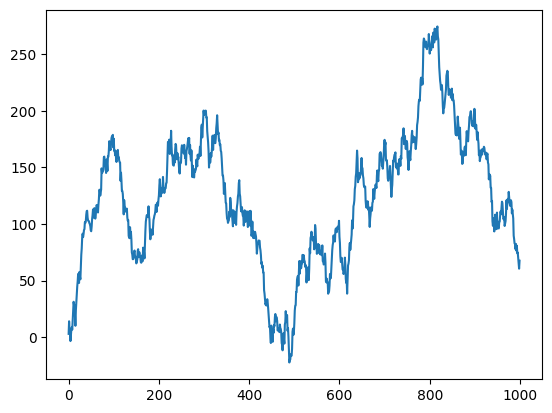

In [3]:
profit['A'].cumsum().plot()

## Problem 2 - Performance Stats 

In [6]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

In [7]:
def compute_stats(rets):
    stats={}
    stats['avg']=rets.mean()*252
    stats['vol']=rets.std()*np.sqrt(252)
    stats['sharpe']=stats['avg']/stats['vol']
    stats['hit_rate']=(rets>0).sum()/rets.count()
    stats = pd.DataFrame(stats)
    return stats

In [8]:
stats = compute_stats(rets)

<Axes: >

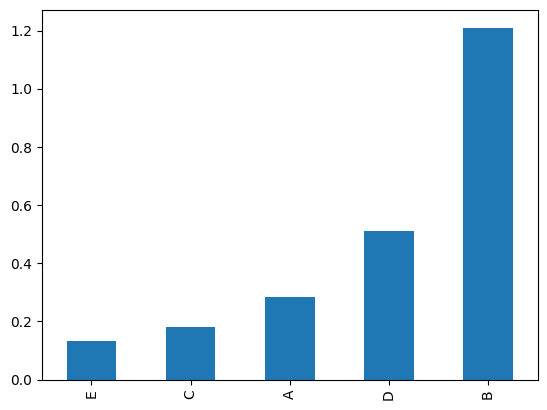

In [9]:
stats['sharpe'].sort_values().plot(kind='bar')

## Problem 3 - Simple Reversal Signal

In [17]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

In [18]:
def reversal_signal(rets):
    ranked = rets.rank(1,method='average')
    
    is_max = (ranked == rets.shape[1]) * 1
    is_min = (ranked == 1) * 1
                
    signal = is_min - is_max
    return signal

In [19]:
signal = reversal_signal(rets)

<Axes: >

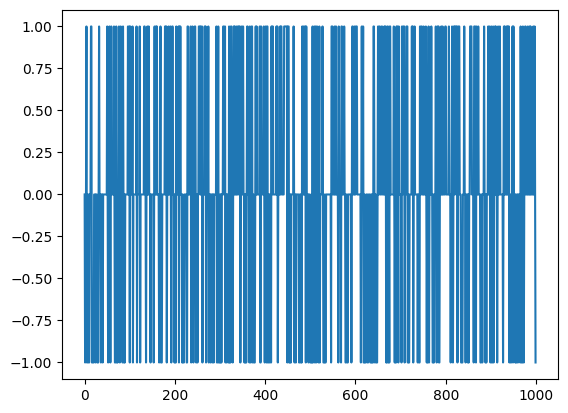

In [20]:
signal['A'].plot()